<a href="https://colab.research.google.com/github/Parcelli/Bioinformatics-upskill/blob/main/sarscov_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
#Read in the metadata file and the nextclade file and merge
#pangolin = pd.read_csv("/content/lineage_report.csv")
#nextclade = pd.read_csv("/content/nextclade.csv",sep=";")
metadata =pd.read_csv("/content/metadata_kenya22.tsv",sep="\t")
metadata.head()
#nextclade
#pangolin

,strain,virus,gisaid_epi_isl,date,region,country,division,location,region_exposure,country_exposure,...,pangolin_lineage,GISAID_clade,originating_lab,submitting_lab,authors,url,title,paper_url,date_submitted,purpose_of_sequencing
0,hCoV-19/Kenya/KDH-1060/2022,betacoronavirus,EPI_ISL_10435882,2022-01-04,Africa,Kenya,Kisumu,NaN,Africa,Kenya,...,BA.1.1,GRA,KEMRI/DEID Surveillance Site (Kisumu County Re...,"USAMRD-A, Basic Science Laboratory","Gathii Kimita, Josphat Nyataya, Esther Omuseni...",https://www.gisaid.org/,?,?,2022-02-28,?
1,hCoV-19/Kenya/KDH-1059/2022,betacoronavirus,EPI_ISL_10435881,2022-01-04,Africa,Kenya,Vihiga,NaN,Africa,Kenya,...,BA.1.1,GRA,KEMRI/DEID Surveillance Site (Kisumu County Re...,"USAMRD-A, Basic Science Laboratory","Gathii Kimita, Josphat Nyataya, Esther Omuseni...",https://www.gisaid.org/,?,?,2022-02-28,?
2,hCoV-19/Kenya/KDH-1057/2022,betacoronavirus,EPI_ISL_10435880,2022-01-04,Africa,Kenya,Vihiga,NaN,Africa,Kenya,...,BA.1.1,GRA,KEMRI/DEID Surveillance Site (Kisumu County Re...,"USAMRD-A, Basic Science Laboratory","Gathii Kimita, Josphat Nyataya, Esther Omuseni...",https://www.gisaid.org/,?,?,2022-02-28,?
3,hCoV-19/Kenya/KDH-1056/2022,betacoronavirus,EPI_ISL_10435879,2022-01-04,Africa,Kenya,Kisumu,NaN,Africa,Kenya,...,BA.1.1.1,GRA,KEMRI/DEID Surveillance Site (Kisumu County Re...,"USAMRD-A, Basic Science Laboratory","Gathii Kimita, Josphat Nyataya, Esther Omuseni...",https://www.gisaid.org/,?,?,2022-02-28,?
4,hCoV-19/Kenya/KDH-1052/2022,betacoronavirus,EPI_ISL_10435878,2022-01-03,Africa,Kenya,Vihiga,NaN,Africa,Kenya,...,BA.1.1,GRA,KEMRI/DEID Surveillance Site (Kisumu County Re...,"USAMRD-A, Basic Science Laboratory","Gathii Kimita, Josphat Nyataya, Esther Omuseni...",https://www.gisaid.org/,?,?,2022-02-28,?


In [ ]:
pangolin.columns

Index(['strain', 'lineage', 'conflict', 'ambiguity_score', 'scorpio_call',
       'scorpio_support', 'scorpio_conflict', 'scorpio_notes', 'version',
       'pangolin_version', 'scorpio_version', 'constellation_version',
       'is_designated', 'qc_status', 'qc_notes', 'note'],
      dtype='object')

In [ ]:
nextclade.columns

Index(['strain', 'clade', 'clade_display', 'clade_who', 'clade_nextstrain',
       'partiallyAliased', 'Nextclade_pango', 'qc.overallScore',
       'qc.overallStatus', 'totalSubstitutions', 'totalDeletions',
       'totalInsertions', 'totalFrameShifts', 'totalMissing', 'totalNonACGTNs',
       'totalAminoacidSubstitutions', 'totalAminoacidDeletions',
       'totalAminoacidInsertions', 'totalUnknownAa', 'alignmentScore',
       'alignmentStart', 'alignmentEnd', 'coverage', 'isReverseComplement',
       'substitutions', 'deletions', 'insertions', 'frameShifts',
       'aaSubstitutions', 'aaDeletions', 'aaInsertions',
       'privateNucMutations.reversionSubstitutions',
       'privateNucMutations.labeledSubstitutions',
       'privateNucMutations.unlabeledSubstitutions',
       'privateNucMutations.totalReversionSubstitutions',
       'privateNucMutations.totalLabeledSubstitutions',
       'privateNucMutations.totalUnlabeledSubstitutions',
       'privateNucMutations.totalPrivateSubstitu

In [ ]:
#nextclade.columns
#Drop the index column
nextclade.drop('index',axis='columns',inplace=True)
#Rename the seqName to strain for easy merging
nextclade.rename(columns={'seqName':'strain'},inplace=True)
pangolin.rename(columns={'taxon':'strain'},inplace=True)

In [ ]:
metadata.columns

Index(['strain', 'virus', 'gisaid_epi_isl', 'date', 'region', 'country',
       'division', 'location', 'region_exposure', 'country_exposure',
       'division_exposure', 'segment', 'length', 'host', 'age', 'sex',
       'pangolin_lineage', 'GISAID_clade', 'originating_lab', 'submitting_lab',
       'authors', 'url', 'title', 'paper_url', 'date_submitted',
       'purpose_of_sequencing'],
      dtype='object')

In [ ]:
nextclade = pd.read_csv("/content/nextclade.csv",sep=";")
nextclade

,index,seqName,clade,clade_display,clade_who,clade_nextstrain,partiallyAliased,Nextclade_pango,qc.overallScore,qc.overallStatus,...,qc.frameShifts.status,qc.stopCodons.stopCodons,qc.stopCodons.totalStopCodons,qc.stopCodons.score,qc.stopCodons.status,totalPcrPrimerChanges,pcrPrimerChanges,failedCdses,warnings,errors
0,2,hCoV-19/Kenya/KDH-1057/2022,21K,21K (BA.1),Omicron,21K,BA.1.1,BA.1.1,0.000000,good,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
1,0,hCoV-19/Kenya/KDH-1060/2022,21K,21K (BA.1),Omicron,21K,BA.1.1,BA.1.1,0.173611,good,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
2,1,hCoV-19/Kenya/KDH-1059/2022,21K,21K (BA.1),Omicron,21K,BA.1.1,BA.1.1,0.694444,good,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
3,4,hCoV-19/Kenya/KDH-1052/2022,21K,21K (BA.1),Omicron,21K,BA.1.1,BA.1.1,6.250000,good,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
4,6,hCoV-19/Kenya/KDH-1046/2022,21K,21K (BA.1),Omicron,21K,BA.1.1,BA.1.1,0.000000,good,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,3149,hCoV-19/Kenya/KEMRI-81-nrb/2022,22B,22B (BA.5),Omicron,22B,BA.5.2.1.9,BF.9,300.181975,bad,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
3150,3150,hCoV-19/Kenya/KEMRI-88/2022,22B,22B (BA.5),Omicron,22B,BA.5.2.1.20,BF.20,418.884444,bad,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
3151,3153,hCoV-19/Kenya/KEMRI-219/2022,22B,22B (BA.5),Omicron,22B,BA.5.2.1,BA.5.2.1,136.803347,bad,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
3152,3151,hCoV-19/Kenya/KEMRI-62/2022,22B,22B (BA.5),Omicron,22B,BA.5.2.1.20,BF.20,6.250000,good,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN


In [ ]:
#Select required columns
pangolin =pangolin[['strain','lineage']]
pangolin.head()

,strain,lineage
0,hCoV-19/Kenya/KDH-1060/2022,BA.1.1
1,hCoV-19/Kenya/KDH-1059/2022,BA.1.1
2,hCoV-19/Kenya/KDH-1057/2022,BA.1.1
3,hCoV-19/Kenya/KDH-1056/2022,BA.1.1.1
4,hCoV-19/Kenya/KDH-1052/2022,BA.1.1


In [ ]:
nextclade = nextclade[['strain','clade_display','Nextclade_pango']]
nextclade.head()

,strain,clade_display,Nextclade_pango
0,hCoV-19/Kenya/KDH-1057/2022,21K (BA.1),BA.1.1
1,hCoV-19/Kenya/KDH-1060/2022,21K (BA.1),BA.1.1
2,hCoV-19/Kenya/KDH-1059/2022,21K (BA.1),BA.1.1
3,hCoV-19/Kenya/KDH-1052/2022,21K (BA.1),BA.1.1
4,hCoV-19/Kenya/KDH-1046/2022,21K (BA.1),BA.1.1


In [ ]:
metadata= metadata[['strain','division','date','sex','age']]
metadata.head()

,strain,division,date,sex,age
0,hCoV-19/Kenya/KDH-1060/2022,Kisumu,2022-01-04,Male,46
1,hCoV-19/Kenya/KDH-1059/2022,Vihiga,2022-01-04,Female,35
2,hCoV-19/Kenya/KDH-1057/2022,Vihiga,2022-01-04,Male,25
3,hCoV-19/Kenya/KDH-1056/2022,Kisumu,2022-01-04,Female,16
4,hCoV-19/Kenya/KDH-1052/2022,Vihiga,2022-01-03,Female,43


In [ ]:
# Merge the three datasets on strain column
merged= pd.merge(metadata,nextclade,on= 'strain')
merged.head()
merged_df = pd.merge(merged,pangolin,on='strain')
merged_df.head()


,strain,division,date,sex,age,clade_display,Nextclade_pango,lineage
0,hCoV-19/Kenya/KDH-1060/2022,Kisumu,2022-01-04,Male,46,21K (BA.1),BA.1.1,BA.1.1
1,hCoV-19/Kenya/KDH-1059/2022,Vihiga,2022-01-04,Female,35,21K (BA.1),BA.1.1,BA.1.1
2,hCoV-19/Kenya/KDH-1057/2022,Vihiga,2022-01-04,Male,25,21K (BA.1),BA.1.1,BA.1.1
3,hCoV-19/Kenya/KDH-1056/2022,Kisumu,2022-01-04,Female,16,21K (BA.1),BA.1.1.1,BA.1.1.1
4,hCoV-19/Kenya/KDH-1052/2022,Vihiga,2022-01-03,Female,43,21K (BA.1),BA.1.1,BA.1.1


In [ ]:
merged_df

,strain,division,date,sex,age,clade_display,Nextclade_pango,lineage
0,hCoV-19/Kenya/KDH-1060/2022,Kisumu,2022-01-04,Male,46,21K (BA.1),BA.1.1,BA.1.1
1,hCoV-19/Kenya/KDH-1059/2022,Vihiga,2022-01-04,Female,35,21K (BA.1),BA.1.1,BA.1.1
2,hCoV-19/Kenya/KDH-1057/2022,Vihiga,2022-01-04,Male,25,21K (BA.1),BA.1.1,BA.1.1
3,hCoV-19/Kenya/KDH-1056/2022,Kisumu,2022-01-04,Female,16,21K (BA.1),BA.1.1.1,BA.1.1.1
4,hCoV-19/Kenya/KDH-1052/2022,Vihiga,2022-01-03,Female,43,21K (BA.1),BA.1.1,BA.1.1
...,...,...,...,...,...,...,...,...
3149,hCoV-19/Kenya/KEMRI-81-nrb/2022,Nairobi,2022-06-16,Male,27,22B (BA.5),BF.9,BA.5.2.1
3150,hCoV-19/Kenya/KEMRI-88/2022,Eldoret,2022-06-16,Female,39,22B (BA.5),BF.20,BF.20
3151,hCoV-19/Kenya/KEMRI-62/2022,Eldoret,2022-06-15,Male,29,22B (BA.5),BF.20,BF.20
3152,hCoV-19/Kenya/KEMRI-211/2022,Nairobi,2022-06-22,Female,31,22B (BA.5),BF.9,BA.5.2.1


from matplotlib import pyplot as plt
import seaborn as sns
merged_df.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sex')):
  _plot_series(series, series_name, i)
  fig.legend(title='sex', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

In [ ]:
#Write out the file to a csv file
merged_df.to_csv("merged_data22.csv")

In [ ]:
#Calculating the counts of females and males
merged_df['sex'].value_counts()

,count
sex,
Male,1618
Female,1459
unknown,77


In [ ]:
#calculate the values in percentage
merged_df['sex'].value_counts(normalize=True)

,proportion
sex,
Male,0.512999
Female,0.462587
unknown,0.024413


In [ ]:
merged_df['sex'].value_counts()

,count
sex,
Male,1618
Female,1459
unknown,77


In [ ]:
len(merged_df)
females_percentage=

3154

In [ ]:
merged_df

,strain,division,date,sex,age,clade_display,Nextclade_pango,lineage
0,hCoV-19/Kenya/KDH-1060/2022,Kisumu,2022-01-04,Male,46,21K (BA.1),BA.1.1,BA.1.1
1,hCoV-19/Kenya/KDH-1059/2022,Vihiga,2022-01-04,Female,35,21K (BA.1),BA.1.1,BA.1.1
2,hCoV-19/Kenya/KDH-1057/2022,Vihiga,2022-01-04,Male,25,21K (BA.1),BA.1.1,BA.1.1
3,hCoV-19/Kenya/KDH-1056/2022,Kisumu,2022-01-04,Female,16,21K (BA.1),BA.1.1.1,BA.1.1.1
4,hCoV-19/Kenya/KDH-1052/2022,Vihiga,2022-01-03,Female,43,21K (BA.1),BA.1.1,BA.1.1
...,...,...,...,...,...,...,...,...
3149,hCoV-19/Kenya/KEMRI-81-nrb/2022,Nairobi,2022-06-16,Male,27,22B (BA.5),BF.9,BA.5.2.1
3150,hCoV-19/Kenya/KEMRI-88/2022,Eldoret,2022-06-16,Female,39,22B (BA.5),BF.20,BF.20
3151,hCoV-19/Kenya/KEMRI-62/2022,Eldoret,2022-06-15,Male,29,22B (BA.5),BF.20,BF.20
3152,hCoV-19/Kenya/KEMRI-211/2022,Nairobi,2022-06-22,Female,31,22B (BA.5),BF.9,BA.5.2.1


In [ ]:
#select the date column and convert the dates to datetime object

merged_df['date']= pd.to_datetime(merged_df['date'])
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   strain           3154 non-null   object        
 1   division         3056 non-null   object        
 2   date             3154 non-null   datetime64[ns]
 3   sex              3154 non-null   object        
 4   age              3154 non-null   object        
 5   clade_display    3154 non-null   object        
 6   Nextclade_pango  3154 non-null   object        
 7   lineage          3154 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 197.2+ KB
<class 'pandas.core.series.Series'>
RangeIndex: 3154 entries, 0 to 3153
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
3154 non-null   object
dtypes: object(1)
memory usage: 24.8+ KB


In [100]:
#Extract month
merged_df['month']= merged_df['date'].dt.month
#Extract month and year using
merged_df['month_year']= merged_df['date'].dt.to_period('M')

In [101]:
merged_df

,strain,division,date,sex,age,clade_display,Nextclade_pango,lineage,month,xbb,year,month_year
0,hCoV-19/Kenya/KDH-1060/2022,Kisumu,2022-01-04,Male,46,21K (BA.1),BA.1.1,BA.1.1,1,False,2022,2022-01
1,hCoV-19/Kenya/KDH-1059/2022,Vihiga,2022-01-04,Female,35,21K (BA.1),BA.1.1,BA.1.1,1,False,2022,2022-01
2,hCoV-19/Kenya/KDH-1057/2022,Vihiga,2022-01-04,Male,25,21K (BA.1),BA.1.1,BA.1.1,1,False,2022,2022-01
3,hCoV-19/Kenya/KDH-1056/2022,Kisumu,2022-01-04,Female,16,21K (BA.1),BA.1.1.1,BA.1.1.1,1,False,2022,2022-01
4,hCoV-19/Kenya/KDH-1052/2022,Vihiga,2022-01-03,Female,43,21K (BA.1),BA.1.1,BA.1.1,1,False,2022,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3149,hCoV-19/Kenya/KEMRI-81-nrb/2022,Nairobi,2022-06-16,Male,27,22B (BA.5),BF.9,BA.5.2.1,6,False,2022,2022-06
3150,hCoV-19/Kenya/KEMRI-88/2022,Eldoret,2022-06-16,Female,39,22B (BA.5),BF.20,BF.20,6,False,2022,2022-06
3151,hCoV-19/Kenya/KEMRI-62/2022,Eldoret,2022-06-15,Male,29,22B (BA.5),BF.20,BF.20,6,False,2022,2022-06
3152,hCoV-19/Kenya/KEMRI-211/2022,Nairobi,2022-06-22,Female,31,22B (BA.5),BF.9,BA.5.2.1,6,False,2022,2022-06


In [108]:
#Identifying the xbb and non-xbb lineages
merged_df['xbb']= merged_df['lineage'].str.startswith('XBB')
merged_df

,strain,division,date,sex,age,clade_display,Nextclade_pango,lineage,month,xbb,year,month_year
0,hCoV-19/Kenya/KDH-1060/2022,Kisumu,2022-01-04,Male,46,21K (BA.1),BA.1.1,BA.1.1,1,False,2022,2022-01
1,hCoV-19/Kenya/KDH-1059/2022,Vihiga,2022-01-04,Female,35,21K (BA.1),BA.1.1,BA.1.1,1,False,2022,2022-01
2,hCoV-19/Kenya/KDH-1057/2022,Vihiga,2022-01-04,Male,25,21K (BA.1),BA.1.1,BA.1.1,1,False,2022,2022-01
3,hCoV-19/Kenya/KDH-1056/2022,Kisumu,2022-01-04,Female,16,21K (BA.1),BA.1.1.1,BA.1.1.1,1,False,2022,2022-01
4,hCoV-19/Kenya/KDH-1052/2022,Vihiga,2022-01-03,Female,43,21K (BA.1),BA.1.1,BA.1.1,1,False,2022,2022-01
...,...,...,...,...,...,...,...,...,...,...,...,...
3149,hCoV-19/Kenya/KEMRI-81-nrb/2022,Nairobi,2022-06-16,Male,27,22B (BA.5),BF.9,BA.5.2.1,6,False,2022,2022-06
3150,hCoV-19/Kenya/KEMRI-88/2022,Eldoret,2022-06-16,Female,39,22B (BA.5),BF.20,BF.20,6,False,2022,2022-06
3151,hCoV-19/Kenya/KEMRI-62/2022,Eldoret,2022-06-15,Male,29,22B (BA.5),BF.20,BF.20,6,False,2022,2022-06
3152,hCoV-19/Kenya/KEMRI-211/2022,Nairobi,2022-06-22,Female,31,22B (BA.5),BF.9,BA.5.2.1,6,False,2022,2022-06


In [112]:
xbb_counts = merged_df.groupby(['month', 'xbb']).size().unstack(fill_value=0)
xbb_counts.rename(columns={False:'Non-XBB',True:'XBB'},inplace=True)
xbb_counts

xbb,Non-XBB,XBB
month,,
1,965,0
2,30,0
3,26,0
4,20,0
5,150,1
6,960,0
7,307,2
8,43,0
9,29,1


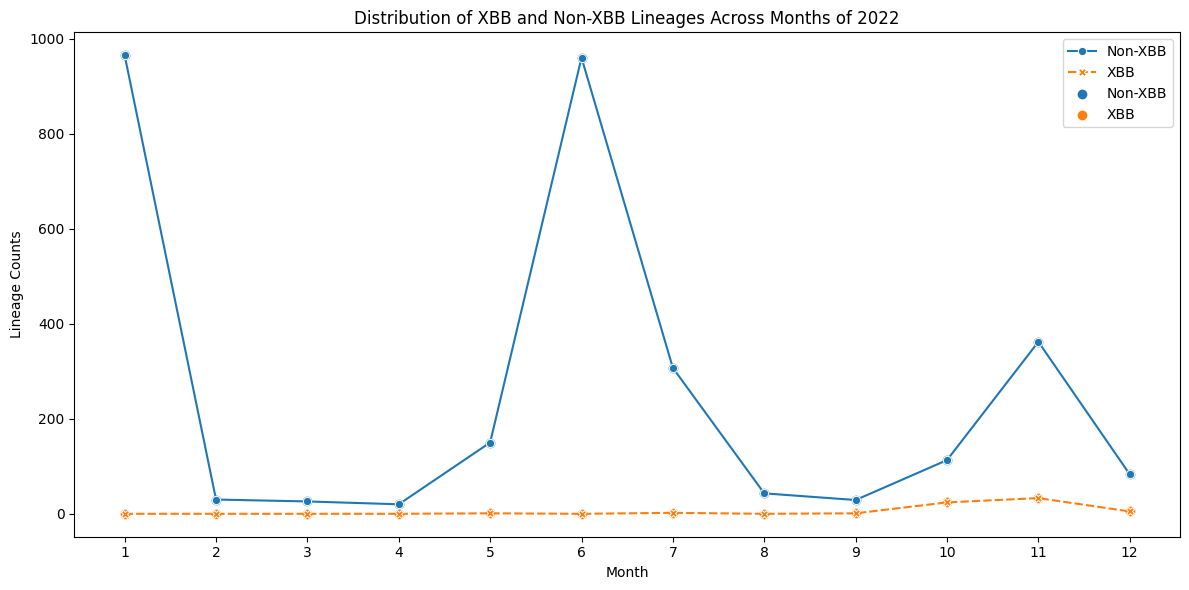

In [114]:
# prompt: plot a line graph showing the distribution of XBB nad non-XBB lineages across the different months of 2022 add points

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'xbb_counts' DataFrame is already created as in the provided code

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=xbb_counts, markers=True)
plt.xlabel("Month")
plt.ylabel("Lineage Counts")
plt.title("Distribution of XBB and Non-XBB Lineages Across Months of 2022")
plt.xticks(xbb_counts.index)  # Rotate x-axis labels for better readability

# Add points to the line graph
for col in xbb_counts.columns:
  plt.scatter(xbb_counts.index, xbb_counts[col], label=col)

plt.legend()
plt.tight_layout()
plt.show()

In [104]:
xbb_counts.to_csv("xbb_count22.csv")

TypeError: Invalid object type at position 0

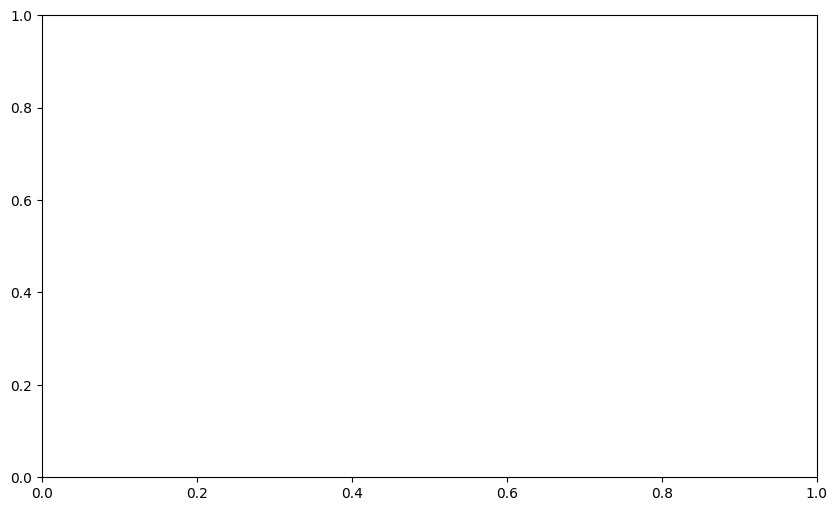

In [110]:
# prompt: plot a line graph showing the distribution of XBB nad non-XBB lineages across the different months of 2022 add points

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# xbb_counts.plot(kind='line', figsize=(10, 6))
# plt.xlabel("Months")
# plt.ylabel("Number of genomes")
# plt.title("Distribution of XBB and Non-XBB lineages")
# plt.xticks(xbb_counts.index)
# plt.legend(title="Lineage type")
# sns.despine(top=True, right=True)
# #plt.grid(axis='y', linestyle='--', alpha=0.7
# plt.show()

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=xbb_counts, markers=True)
sns.despine(top=True, right=True)
plt.xlabel("Month")
plt.ylabel("Genome Count")
plt.legend(title="Lineage Type")
plt.title("Temporal fluctuation of XBB and Non-XBB Lineages in 2022")
plt.xticks(xbb_counts.index)  # Ensure all month ticks are displayed
plt.show()

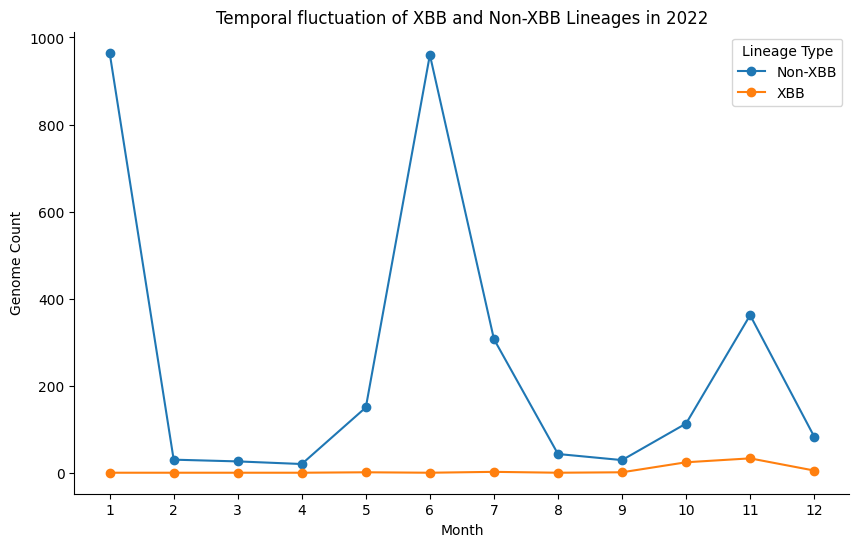

In [116]:
# prompt: # prompt: plot a line graph showing the distribution of XBB nad non-XBB lineages across the different months of 2022 use same marker points

# Assuming 'xbb_counts' DataFrame is already created as in the provided code.

# Create the plot
plt.figure(figsize=(10, 6))
for lineage_type in xbb_counts.columns:
    plt.plot(xbb_counts.index, xbb_counts[lineage_type], marker='o', label=lineage_type)  # Use the same marker for both lines

plt.xlabel("Month")
plt.ylabel("Genome Count")
plt.title("Temporal fluctuation of XBB and Non-XBB Lineages in 2022")
plt.xticks(xbb_counts.index)  # Ensure all month ticks are displayed
plt.legend(title="Lineage Type")
sns.despine(top=True, right=True)
plt.show()

In [ ]:
merged_2022['xbb'].dtype

dtype('bool')